<a target="_blank" href="https://colab.research.google.com/github/murphyqm/key-data-vis-requirements/blob/main/docs/nbs/01_datavis_solutions.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Controlling basic figure aesthetics when building plots

This section will work through some basic steps for controlling figure aesthetics. We will set up some randomly generated data using the [Numpy random module](https://numpy.org/doc/stable/reference/random/index.html#random-quick-start).



In [1]:
# import necessary packages

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd



There are a caveats to keep in mind when working with a notebook:

- In general, you will want to keep all code for a single figure within a single cell
- Displaying a figure will work differently if you download and run this notebook as a `.py` file: you will need to include `plt.show()`

## Generate random data

Here, we're using a random number generator to create three normal distributions of floats, and two categorical arrays.

Don't worry about the random number generator logic; that's intermediate to advanced Python and not important for today's session!

To turn each of our `array` objects that hold these random samples into a nice format to work with, we create a `dictionary` object and use this to build a `DataFrame` using the pandas library.

In later sessions, we will replace the following data creation work with some code to load real data.

In [2]:
# construct random number generator
# see https://numpy.org/doc/stable/reference/random/generator.html

# set random seed for reproducibility
random_seed = 42

rng = np.random.default_rng(random_seed)
print(rng)

size = 100

# a normal distribution
mu, sigma = 50, 35 # mean and standard deviation
dist_1 = rng.normal(mu, sigma, size)

# a normal distribution
mu2, sigma2 = 40, 50 # mean and standard deviation
dist_2 = rng.normal(mu2, sigma2, size)

# a normal distribution
mu3, sigma3 = 85, 15 # mean and standard deviation
dist_3 = rng.normal(mu3, sigma3, size)

# create category variables
cat_labels = ["Cat. 1", "Cat. 2", "Cat. 3", "Cat. 4"]
group_labels = ["Group 1", "Group 2", "Group 3", "Group 4"]

# randomly select them
categories = rng.choice(cat_labels, size=size)
groups = rng.choice(group_labels, size=size)

# create a dictionary
data_dictionary = {
    "Distribution 1": dist_1,
    "Distribution 2": dist_2,
    "Distribution 3": dist_3,
    "Categories": categories,
    "Groups": groups,
}

# turn this dictionary into a data frame
data = pd.DataFrame(data_dictionary)

Generator(PCG64)


In [3]:
# check that the data frame looks sensible
data

,Distribution 1,Distribution 2,Distribution 3,Categories,Groups
0,60.665098,21.091872,90.063618,Cat. 3,Group 4
1,13.600556,104.961415,106.112228,Cat. 1,Group 1
2,76.265792,22.186801,86.358774,Cat. 2,Group 3
3,82.919765,76.875778,94.659082,Cat. 2,Group 1
4,-18.286232,-6.680884,54.247418,Cat. 3,Group 2
...,...,...,...,...,...
95,-0.648937,-4.736351,87.647686,Cat. 3,Group 4
96,3.705514,72.166340,89.439910,Cat. 1,Group 1
97,15.096361,20.269744,79.421281,Cat. 4,Group 3
98,63.992098,39.743907,58.649173,Cat. 4,Group 1


## Matplotlib Basics

There are essentially two ways to use Matplotlib:

- Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").

- Rely on pyplot to implicitly create and manage the Figures and Axes, and use pyplot functions for plotting.

From Matplotlib [docs](https://matplotlib.org/stable/users/explain/quick_start.html):

> Matplotlib's documentation and examples use both the OO and the pyplot styles. In general, we suggest using the OO style, particularly for complicated plots, and functions and scripts that are intended to be reused as part of a larger project. However, the pyplot style can be very convenient for quick interactive work.

We will run through one example using the pyplot approach, but will focus on the object-oriented approach for the rest of the course.

For the next few examples, we're going to plot "Distribution 1" against "Distribution 2". We can access these "columns" of our data frame using the following notation:



```
# Distribution 1
data["Distribution 1"]

# Distribution 2
data["Distribution 2"]
```



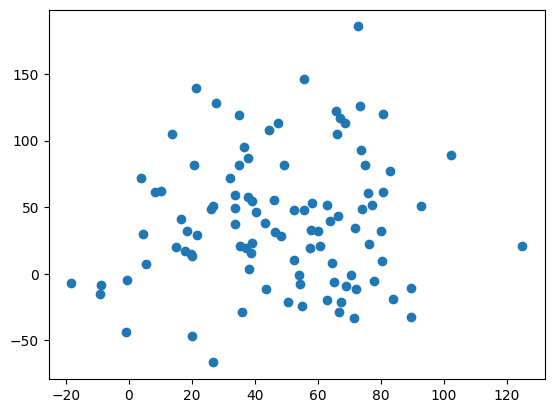

In [4]:
# pyplot approach

plt.scatter(x=data["Distribution 1"], y=data["Distribution 2"])

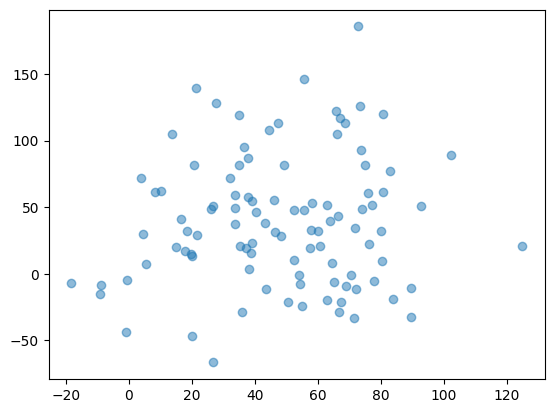

In [5]:
# pyplot approach
# add some features:
# alpha controls opacity and is useful when there's overlap

plt.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.5)

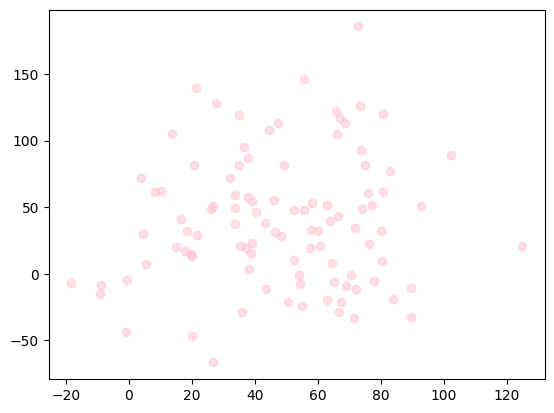

In [6]:
# pyplot approach
# add some features:
# alpha controls opacity and is useful when there's overlap
# we can define colour using a named colour:https://matplotlib.org/stable/gallery/color/named_colors.html

plt.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.5,
            color="pink")

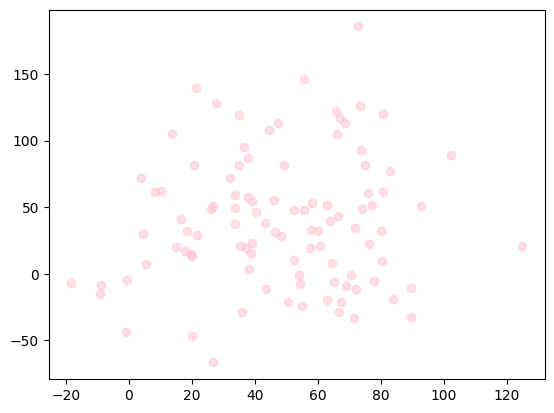

In [7]:
# pyplot approach
# add some features:
# alpha controls opacity and is useful when there's overlap
# we can define colour using a named colour:https://matplotlib.org/stable/gallery/color/named_colors.html
# or we can define it using a hexcode wrapped in quotation marks, like "#FFC0CB"


plt.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.5,
            color="#FFC0CB")

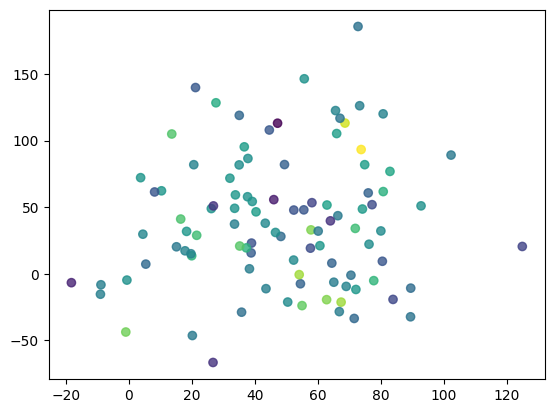

In [8]:
# pyplot approach
# add some features:
# alpha controls opacity and is useful when there's overlap
# we can define colour using a named colour:https://matplotlib.org/stable/gallery/color/named_colors.html
# or we can define it using a hexcode wrapped in quotation marks, like "#FFC0CB"
# instead of providing "color", we can instead give another dataset to "c"


plt.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.8,
            c=data["Distribution 3"])

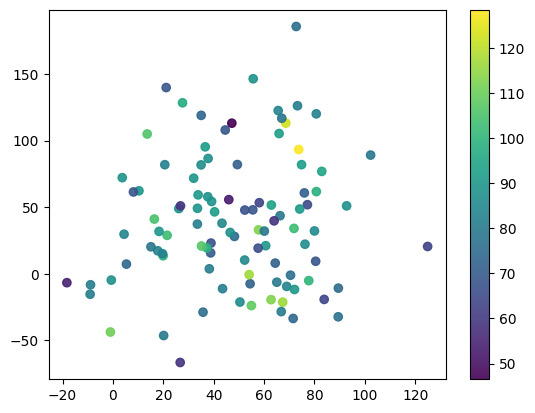

In [9]:
# pyplot approach
# add some features:
# alpha controls opacity and is useful when there's overlap
# we can define colour using a named colour:https://matplotlib.org/stable/gallery/color/named_colors.html
# or we can define it using a hexcode wrapped in quotation marks, like "#FFC0CB"
# instead of providing "color", we can instead give another dataset to "c"
# if we use a colour map, we should include a colour scale using "colorbar"


plt.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.9,
            c=data["Distribution 3"])
plt.colorbar()

Text(0.5, 1.0, 'Example Plot')

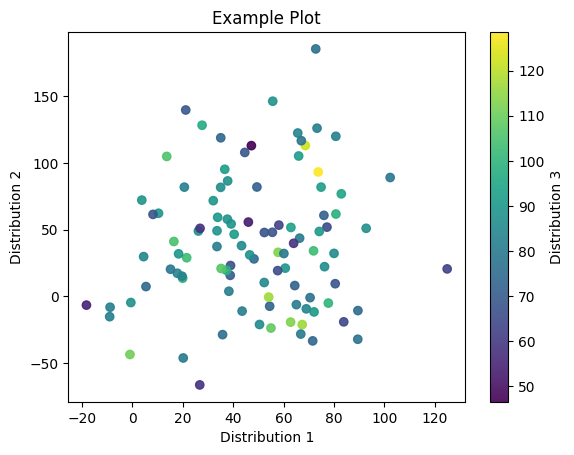

In [10]:
# pyplot approach
# add some features:
# alpha controls opacity and is useful when there's overlap
# we can define colour using a named colour:https://matplotlib.org/stable/gallery/color/named_colors.html
# or we can define it using a hexcode wrapped in quotation marks, like "#FFC0CB"
# instead of providing "color", we can instead give another dataset to "c"
# if we use a colour map, we should include a colour scale using "colorbar"
# we also need to add axes labels and a title


plt.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.9,
            c=data["Distribution 3"])
plt.colorbar(label="Distribution 3")
plt.xlabel("Distribution 1")
plt.ylabel("Distribution 2")
plt.title("Example Plot")

Text(0.5, 1.0, 'Example Plot')

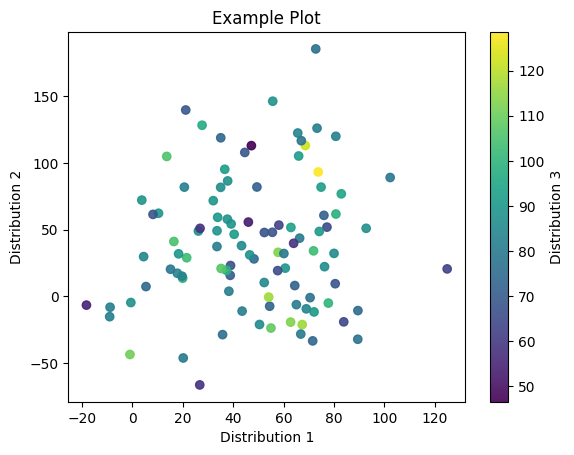

In [11]:
# pyplot approach
# add some features:
# alpha controls opacity and is useful when there's overlap
# we can define colour using a named colour:https://matplotlib.org/stable/gallery/color/named_colors.html
# or we can define it using a hexcode wrapped in quotation marks, like "#FFC0CB"
# instead of providing "color", we can instead give another dataset to "c"
# if we use a colour map, we should include a colour scale using "colorbar"
# we also need to add axes labels and a title


plt.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.9,
            c=data["Distribution 3"])
plt.colorbar(label="Distribution 3")
plt.xlabel("Distribution 1")
plt.ylabel("Distribution 2")
plt.title("Example Plot")

Text(0.5, 1.0, 'Example Plot')

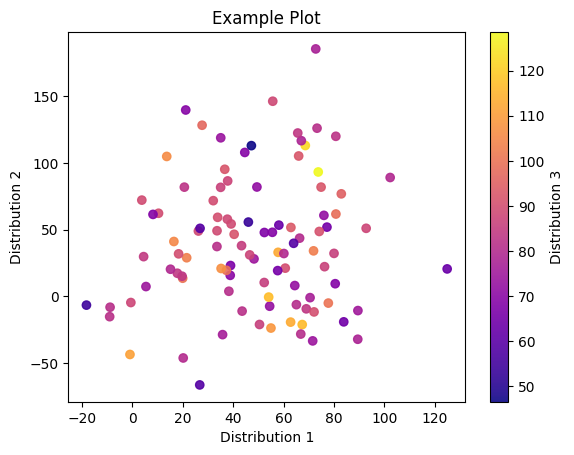

In [12]:
# pyplot approach
# add some features:
# alpha controls opacity and is useful when there's overlap
# we can define colour using a named colour:https://matplotlib.org/stable/gallery/color/named_colors.html
# or we can define it using a hexcode wrapped in quotation marks, like "#FFC0CB"
# instead of providing "color", we can instead give another dataset to "c"
# if we use a colour map, we should include a colour scale using "colorbar"
# we also need to add axes labels and a title
# We can change the colour map used with the argument "cmap": https://matplotlib.org/stable/users/explain/colors/colormaps.html


plt.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.9,
            c=data["Distribution 3"],
            cmap="plasma")
plt.colorbar(label="Distribution 3")
plt.xlabel("Distribution 1")
plt.ylabel("Distribution 2")
plt.title("Example Plot")

### Moving to an o o approach

As you can see, the pyplot approach is a quick and easy way to plot your data: you can get a crude plot with a single line of code


```
plt.scatter(x=data["Distribution 1"], y=data["Distribution 2"])
```

However, as we relying on pyplot to handle some of the background settings, it can be difficult to fine-tune and tweak plots with this interface.

A more "Pythonic" way uses the object-oriented (o o) interface. Read more [here](https://matplotlib.org/stable/users/explain/quick_start.html#the-explicit-and-the-implicit-interfaces).

Before we look at how to build a figure using the o o interface, let's look at the components involved.

![Anatomy of a figure](https://matplotlib.org/stable/_images/anatomy.png)

*From [Matplotlib documentation](https://matplotlib.org/stable/users/explain/quick_start.html#parts-of-a-figure)*

1. **figure** - the **figure** is like the sheet of paper where everything else is drawn on top of. It's a box where all the parts of the figure are stored.
2. **axes** - the **axes** are the area in which the data is plotted. This can be thought of like a "panel" of the plot; there can be one or many.
3. **axis** - each **axes** contains (usually) two **axis** objects - these are the x and y axes of your plot, and contain features like labels, and tick locators.

|       |   |  **figure** object  |   |   |
|-------|---|---------------------|---|---|
|       |   | **axes** objects   |   |    |
| xaxis | yaxis | xlabel | ylabel | spines |


**So to begin, we need to define the figure, then the axes, then we can set features related to each of these objects.**

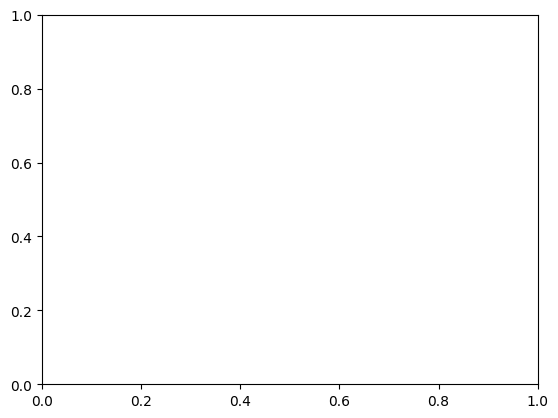

In [14]:
# first we define the figure and axes objects

fig = plt.figure()
ax = fig.subplots()

# This can also be squashed into a single line:
# fig, ax = plt.subplots()

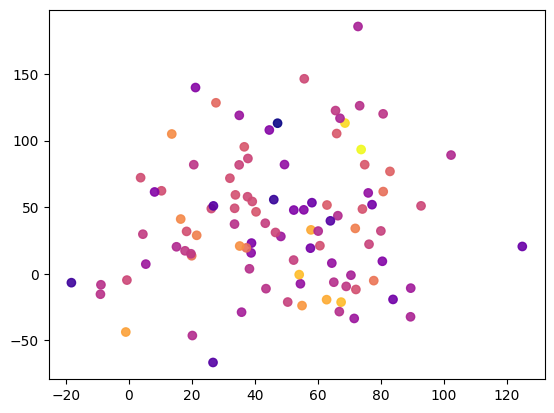

In [15]:
# first we define the figure and axes objects

fig = plt.figure()
ax = fig.subplots()

# Then, we add our data to the ax object
# we can use the same arguments as we did fo the pyplot style plot
ax.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.9,
            c=data["Distribution 3"],
            cmap="plasma")


TypeError: FigureBase.colorbar() missing 1 required positional argument: 'mappable'

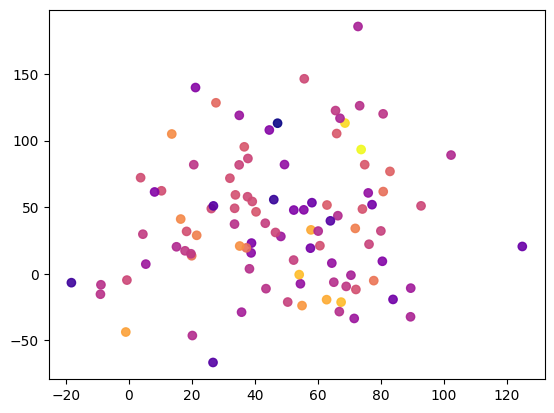

In [20]:
# first we define the figure and axes objects

fig = plt.figure()
ax = fig.subplots()

# Then, we add our data to the ax object
# we can use the same arguments as we did fo the pyplot style plot
ax.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.9,
            c=data["Distribution 3"],
            cmap="plasma")

# we need to add a colour scale
fig.colorbar()

# but now, the function is looking for a "mappable"?

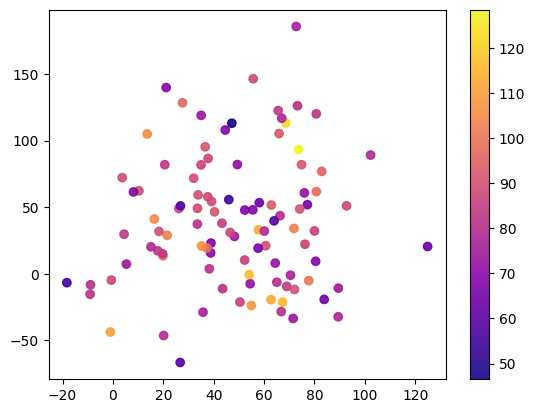

In [21]:
# first we define the figure and axes objects

fig = plt.figure()
ax = fig.subplots()

# Then, we add our data to the ax object
# we can use the same arguments as we did fo the pyplot style plot
s = ax.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.9,
            c=data["Distribution 3"],
            cmap="plasma")

# we need to add a colour scale
# but now, the function is looking for a "mappable" - so we need to assign
# our scatter plot above to a variable, then pass this in
# lets call it s for scatter
fig.colorbar(s)


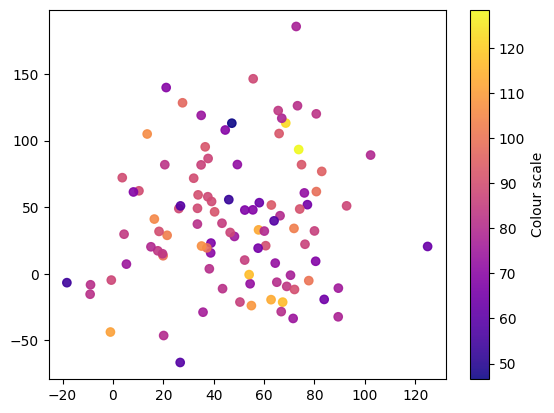

In [22]:
# first we define the figure and axes objects

fig = plt.figure()
ax = fig.subplots()

# Then, we add our data to the ax object
# we can use the same arguments as we did fo the pyplot style plot
s = ax.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.9,
            c=data["Distribution 3"],
            cmap="plasma")

# we need to add a colour scale
# but now, the function is looking for a "mappable" - so we need to assign
# our scatter plot above to a variable, then pass this in
# lets call it s for scatter

# We need to add a colorbar label
fig.colorbar(s, label="Colour scale")


Text(0, 0.5, 'Distribution 2')

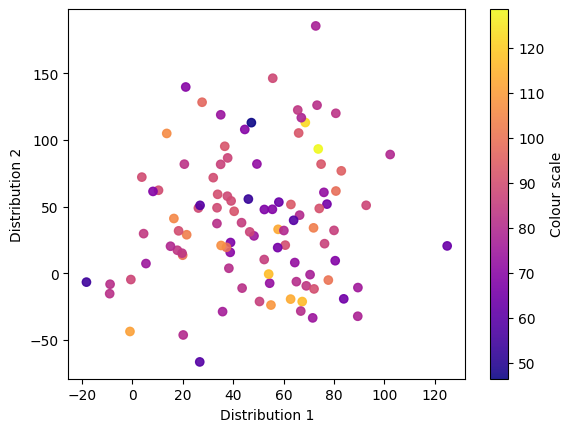

In [23]:
# first we define the figure and axes objects

fig = plt.figure()
ax = fig.subplots()

# Then, we add our data to the ax object
# we can use the same arguments as we did fo the pyplot style plot
s = ax.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.9,
            c=data["Distribution 3"],
            cmap="plasma")

# we need to add a colour scale
# but now, the function is looking for a "mappable" - so we need to assign
# our scatter plot above to a variable, then pass this in
# lets call it s for scatter

# We need to add a colorbar label
fig.colorbar(s, label="Colour scale")

# We also need to add some x and y labels
# this is a little bit different again
ax.set_xlabel("Distribution 1")
ax.set_ylabel("Distribution 2")


Text(0.5, 1.0, 'Figure title')

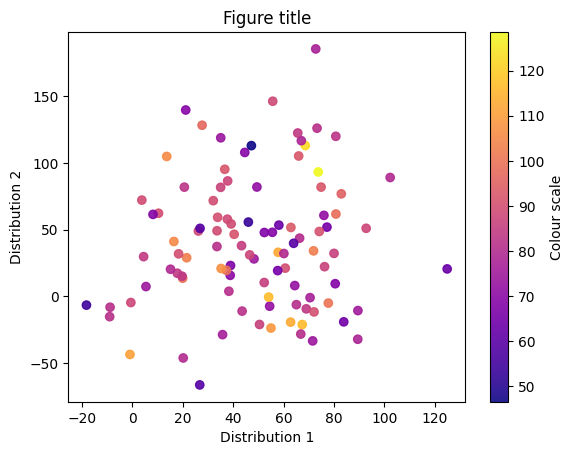

In [25]:
# first we define the figure and axes objects

fig = plt.figure()
ax = fig.subplots()

# Then, we add our data to the ax object
# we can use the same arguments as we did fo the pyplot style plot
s = ax.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.9,
            c=data["Distribution 3"],
            cmap="plasma")

# we need to add a colour scale
# but now, the function is looking for a "mappable" - so we need to assign
# our scatter plot above to a variable, then pass this in
# lets call it s for scatter

# We need to add a colorbar label
fig.colorbar(s, label="Colour scale")

# We also need to add some x and y labels
# this is a little bit different again
ax.set_xlabel("Distribution 1")
ax.set_ylabel("Distribution 2")

# and lets add a title

ax.set_title("Figure title")

# More customisation

Now that we have an idea of how to use tyhe object-oriented or o o method of plotting with Matplotlib, let's dig a bit deeper into customising our figures,
and look at how we might group data.

Lets first look at different ways to group data using basic encoding.

Let's start by building a very simple figure, and then adding to it.

Text(0.5, 1.0, 'Figure title')

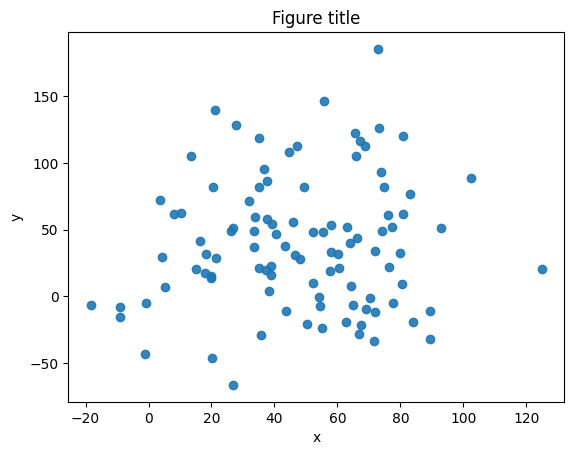

In [26]:
# first we define the figure and axes objects
fig = plt.figure()
ax = fig.subplots()

# Then, we add our data to the ax object
# we can use the same arguments as we did fo the pyplot style plot
ax.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.9,)

# We also need to add some x and y labels
# this is a little bit different again
ax.set_xlabel("x")
ax.set_ylabel("y")

# add a title
ax.set_title("Figure title")

If we want to include multiple different distributions on the one plot, we can look at different encoding options.

We can repeat the "scatter" functon on the same ax object. By default, Matplotlib will use a different colour from the default Matplotlib colour [palette](https://matplotlib.org/stable/users/explain/colors/colormaps.html#qualitative).

Text(0.5, 1.0, 'Figure title')

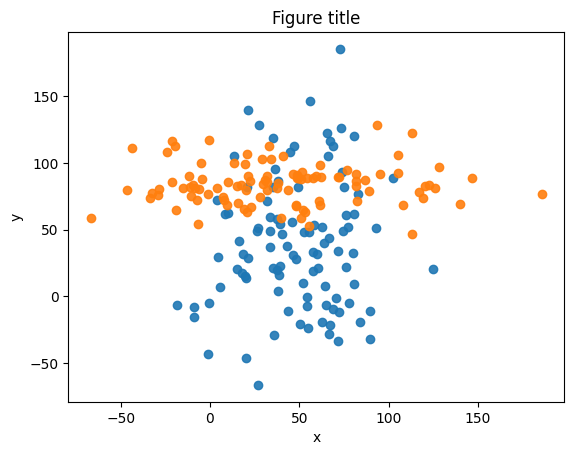

In [27]:
# first we define the figure and axes objects
fig = plt.figure()
ax = fig.subplots()

# Then, we add our data to the ax object
# we can add multiple data sets
ax.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.9,)
ax.scatter(x=data["Distribution 2"], y=data["Distribution 3"], alpha=0.9,)

# We also need to add some x and y labels
# this is a little bit different again
ax.set_xlabel("x")
ax.set_ylabel("y")

# add a title
ax.set_title("Figure title")

Text(0.5, 1.0, 'Figure title')

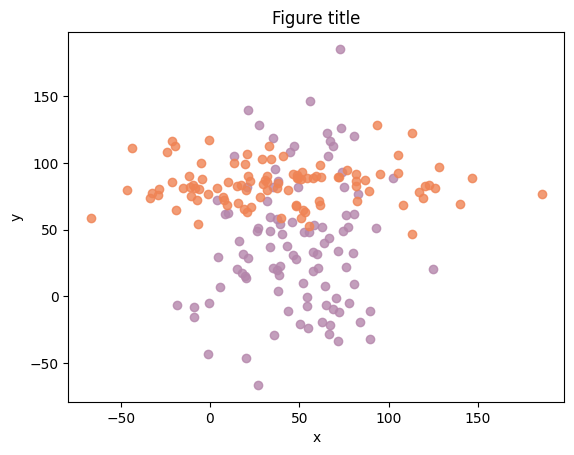

In [30]:
# first we define the figure and axes objects
fig = plt.figure()
ax = fig.subplots()

# Then, we add our data to the ax object
# we can add multiple data sets
# We can define a specific colour for each of these
ax.scatter(x=data["Distribution 1"], y=data["Distribution 2"],
           alpha=0.8, color="#B486AB")
ax.scatter(x=data["Distribution 2"], y=data["Distribution 3"],
           alpha=0.8, color="#EF8354")

# We also need to add some x and y labels
# this is a little bit different again
ax.set_xlabel("x")
ax.set_ylabel("y")

# add a title
ax.set_title("Figure title")

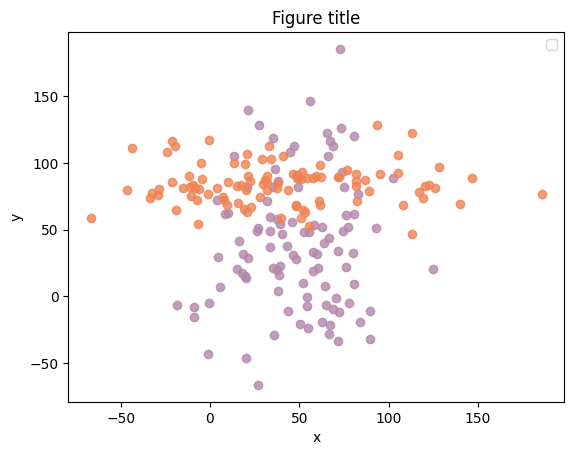

In [31]:
# first we define the figure and axes objects
fig = plt.figure()
ax = fig.subplots()

# Then, we add our data to the ax object
# we can add multiple data sets
# We can define a specific colour for each of these
ax.scatter(x=data["Distribution 1"], y=data["Distribution 2"],
           alpha=0.8, color="#B486AB")
ax.scatter(x=data["Distribution 2"], y=data["Distribution 3"],
           alpha=0.8, color="#EF8354")

# We also need to add some x and y labels
# this is a little bit different again
ax.set_xlabel("x")
ax.set_ylabel("y")

# add a title
ax.set_title("Figure title")

# but we now need to add a legend!
ax.legend()

# This will just return a warning for now, because we need to add labels to our data

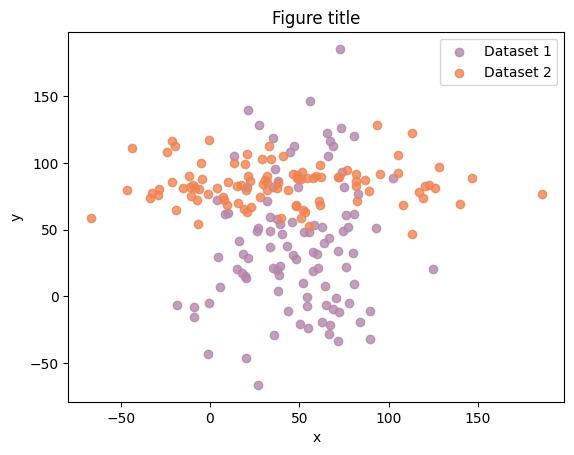

In [38]:
# first we define the figure and axes objects
fig = plt.figure()
ax = fig.subplots()

# Then, we add our data to the ax object
# we can add multiple data sets
# We can define a specific colour for each of these
# Add labels to the datasets
ax.scatter(x=data["Distribution 1"], y=data["Distribution 2"],
           alpha=0.8, color="#B486AB",
           label="Dataset 1")
ax.scatter(x=data["Distribution 2"], y=data["Distribution 3"],
           alpha=0.8, color="#EF8354",
           label="Dataset 2")

# We also need to add some x and y labels
# this is a little bit different again
ax.set_xlabel("x")
ax.set_ylabel("y")

# add a title
ax.set_title("Figure title")

# but we now need to add a legend!
ax.legend()


Using *only* colour can be a bad idea, as this can be difficult to distinguish if the plot is printed in greyscale, or if the audience has a colour vision deficiency: it's a good idea to double up and use another encoding method.

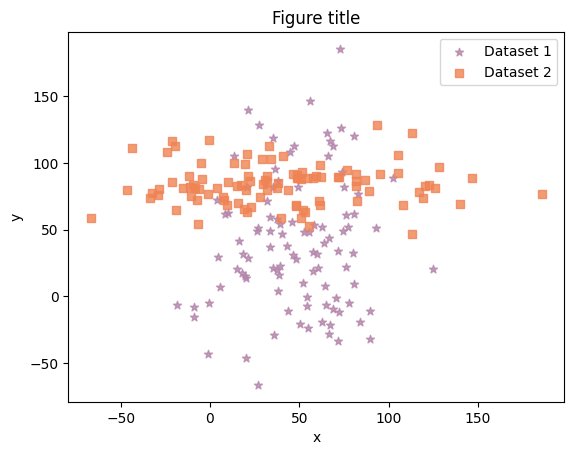

In [39]:
# first we define the figure and axes objects
fig = plt.figure()
ax = fig.subplots()

# Then, we add our data to the ax object
# we can add multiple data sets
# We can define a specific colour for each of these
# Add labels to the datasets
# Add a marker style
ax.scatter(x=data["Distribution 1"], y=data["Distribution 2"],
           alpha=0.8, color="#B486AB",
           label="Dataset 1",
           marker="*")
ax.scatter(x=data["Distribution 2"], y=data["Distribution 3"],
           alpha=0.8, color="#EF8354",
           label="Dataset 2",
           marker="s")

# We also need to add some x and y labels
# this is a little bit different again
ax.set_xlabel("x")
ax.set_ylabel("y")

# add a title
ax.set_title("Figure title")

# but we now need to add a legend!
ax.legend()


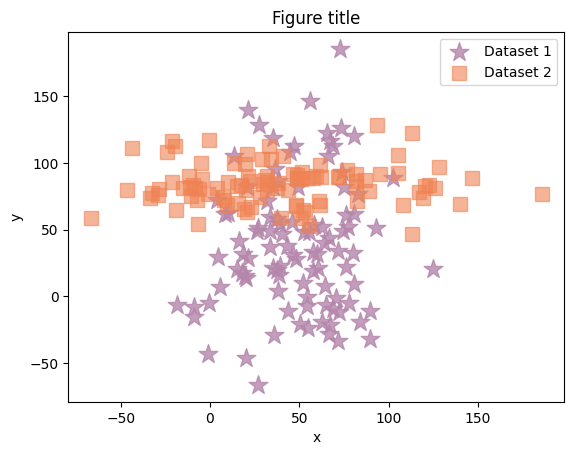

In [46]:
# first we define the figure and axes objects
fig = plt.figure()
ax = fig.subplots()

# Then, we add our data to the ax object
# we can add multiple data sets
# We can define a specific colour for each of these
# Add labels to the datasets
# Add a marker style
# We can also use s to define size
ax.scatter(x=data["Distribution 1"], y=data["Distribution 2"],
           alpha=0.8, color="#B486AB",
           label="Dataset 1",
           marker="*", s=200)
ax.scatter(x=data["Distribution 2"], y=data["Distribution 3"],
           alpha=0.6, color="#EF8354",
           label="Dataset 2",
           marker="s", s=100)

# We also need to add some x and y labels
# this is a little bit different again
ax.set_xlabel("x")
ax.set_ylabel("y")

# add a title
ax.set_title("Figure title")

# but we now need to add a legend!
ax.legend()

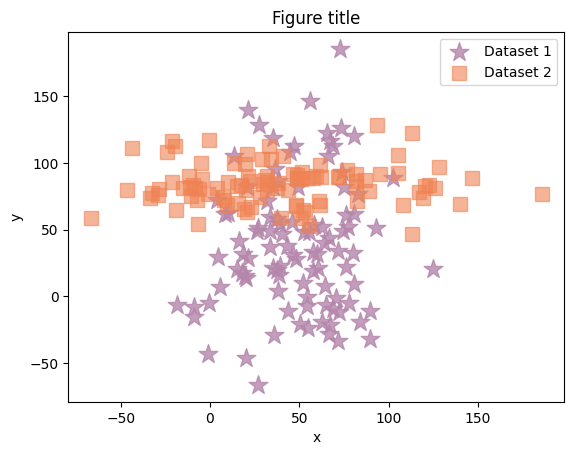

In [47]:
# first we define the figure and axes objects
fig = plt.figure()
ax = fig.subplots()

# Then, we add our data to the ax object
# we can add multiple data sets
# We can define a specific colour for each of these
# Add labels to the datasets
# Add a marker style
# We can also use s to define size
ax.scatter(x=data["Distribution 1"], y=data["Distribution 2"],
           alpha=0.8, color="#B486AB",
           label="Dataset 1",
           marker="*", s=200)
ax.scatter(x=data["Distribution 2"], y=data["Distribution 3"],
           alpha=0.6, color="#EF8354",
           label="Dataset 2",
           marker="s", s=100)

# We also need to add some x and y labels
# this is a little bit different again
ax.set_xlabel("x")
ax.set_ylabel("y")

# add a title
ax.set_title("Figure title")

# but we now need to add a legend!
ax.legend()

## Using external libraries to change plot aesthetics

We are going to use the seaborn library to set the "theme" of our plots.

We'll start off by applying the default seaborn theme to our plots by using the following line of code:

```
sns.set_theme()
```

It's really useful to remember how to undo these settings too in case you want to return to the default matplotlib plot aesthetic; simply run this line of code and then following plots will not use the seaborn theme.
```
matplotlib.rc_file_defaults()
```



In [53]:
import matplotlib
import seaborn as sns

Lets repeat the basic plot we used before, and run it first with our basic matplotlib theme, thn lets add the seaborn theming:

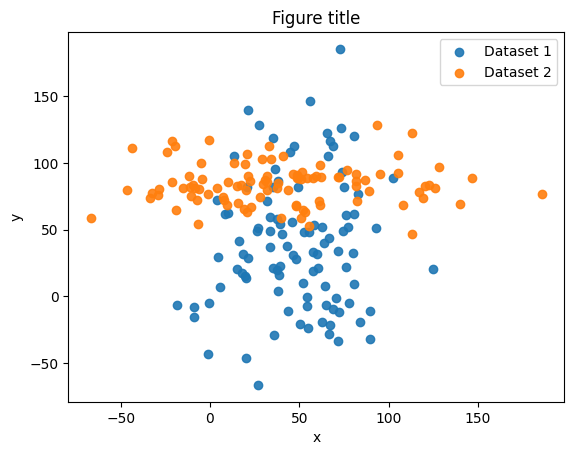

In [55]:
# Ensuring we are using the default matplotlib settings
matplotlib.rc_file_defaults()

# first we define the figure and axes objects
fig = plt.figure()
ax = fig.subplots()

# Then, we add our data to the ax object
# we can add multiple data sets
ax.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.9,
           label="Dataset 1")
ax.scatter(x=data["Distribution 2"], y=data["Distribution 3"], alpha=0.9,
           label="Dataset 2")

# We also need to add some x and y labels
# this is a little bit different again
ax.set_xlabel("x")
ax.set_ylabel("y")

# add a title
ax.set_title("Figure title")

ax.legend()

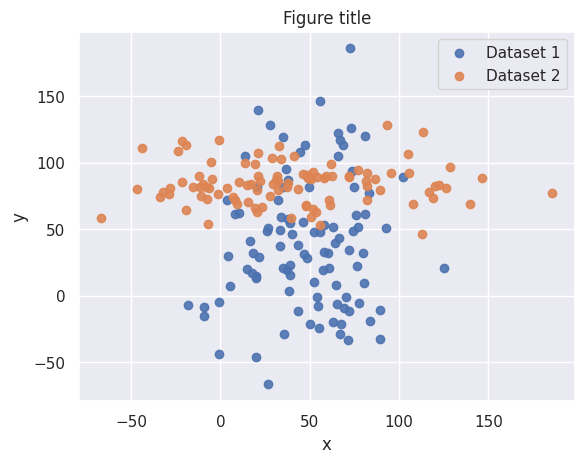

In [56]:
sns.set_theme()

# first we define the figure and axes objects
fig = plt.figure()
ax = fig.subplots()

# Then, we add our data to the ax object
# we can add multiple data sets
ax.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.9,
           label="Dataset 1")
ax.scatter(x=data["Distribution 2"], y=data["Distribution 3"], alpha=0.9,
           label="Dataset 2")

# We also need to add some x and y labels
# this is a little bit different again
ax.set_xlabel("x")
ax.set_ylabel("y")

# add a title
ax.set_title("Figure title")

ax.legend()

We can define a range of different arguments within this [seaborn theme function](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme). Here are some of the most useful settings along with their default settings.

```
sns.set_theme(context='notebook', style='darkgrid', palette='deep',)
```

Let's try out some of these different settings:

- [Context](https://seaborn.pydata.org/generated/seaborn.plotting_context.html#seaborn.plotting_context)
- [Style](https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style)
- [Palette](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette)

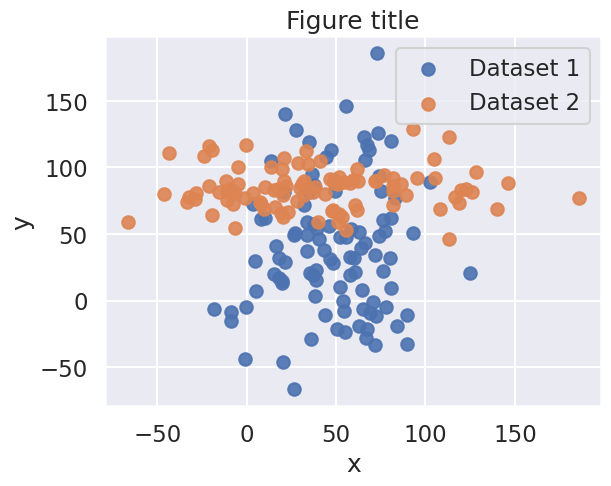

In [59]:
sns.set_theme(context="talk")

# first we define the figure and axes objects
fig = plt.figure()
ax = fig.subplots()

# Then, we add our data to the ax object
# we can add multiple data sets
ax.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.9,
           label="Dataset 1")
ax.scatter(x=data["Distribution 2"], y=data["Distribution 3"], alpha=0.9,
           label="Dataset 2")

# We also need to add some x and y labels
# this is a little bit different again
ax.set_xlabel("x")
ax.set_ylabel("y")

# add a title
ax.set_title("Figure title")

ax.legend()

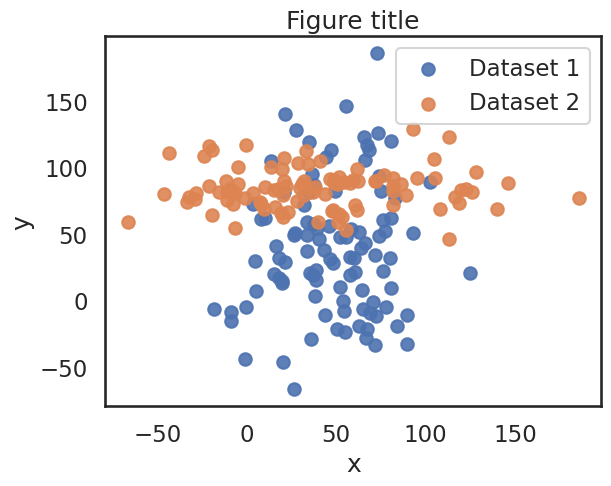

In [60]:
sns.set_theme(context="talk", style="white")

# first we define the figure and axes objects
fig = plt.figure()
ax = fig.subplots()

# Then, we add our data to the ax object
# we can add multiple data sets
ax.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.9,
           label="Dataset 1")
ax.scatter(x=data["Distribution 2"], y=data["Distribution 3"], alpha=0.9,
           label="Dataset 2")

# We also need to add some x and y labels
# this is a little bit different again
ax.set_xlabel("x")
ax.set_ylabel("y")

# add a title
ax.set_title("Figure title")

ax.legend()

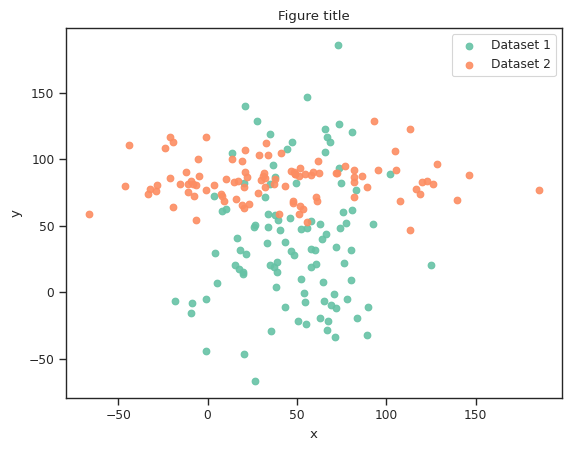

In [61]:
sns.set_theme(context="paper", style="ticks", palette="Set2")

# first we define the figure and axes objects
fig = plt.figure()
ax = fig.subplots()

# Then, we add our data to the ax object
# we can add multiple data sets
ax.scatter(x=data["Distribution 1"], y=data["Distribution 2"], alpha=0.9,
           label="Dataset 1")
ax.scatter(x=data["Distribution 2"], y=data["Distribution 3"], alpha=0.9,
           label="Dataset 2")

# We also need to add some x and y labels
# this is a little bit different again
ax.set_xlabel("x")
ax.set_ylabel("y")

# add a title
ax.set_title("Figure title")

ax.legend()

# Saving and exporting figures

There are a number of different ways to save a figure.

Directly from the notebook, we can right click and select "save image as". However, this gives us no control over export settings such as resolution etc.

A better idea is to instead use the matplotlib interface:

```
fig.savefig("file_name_here.png")
```

Add the filename in quotation marks in this function call. Matplotlib will automatically parse the filename; try out different file extensions.

## File formats

We can save our file as a raster image (pixellated), such as a JPEG or PNG, or as a vector image format, such as SVG or PDF.

<a title="Yug, modifications by Cfaerber et al., CC BY-SA 2.5 &lt;https://creativecommons.org/licenses/by-sa/2.5&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Bitmap_VS_SVG.svg"><img width="512" alt="Bitmap VS SVG" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Bitmap_VS_SVG.svg/512px-Bitmap_VS_SVG.svg.png?20240513185451"></a>

You will need to create different file types for different settings:

#### Vector files

- Vector images are useful as they can be "zoomed in" infinitely, never losing their sharpness
- However, a vector image will be very slow to render if it has many objects (such as a large scatter plot, where everyu point is individually layered)
- DPI/resolution doesn't have a meaning when it comes to vector plots
- Setting the figure size is still important for ensuring that the font size is correct
- Gradient backgrounds/heatmaps cannot be vectorised

#### Raster files

- Raster files are composed of pixels; this means that plot file sizes do not increase with an increasing number of points on the plot
- Fixing the figure size and export resolution is important to ensure the figure is not blurry
- We can set the DPI or "dots per inch" inside the savefig function call.

## Figure size

Up until now, we have used the default figure size, but we will need to specify it when saving out figures to ensure they are an appropriate size.

See the [Figure Size](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html) documentation.

We can supply the *width x height* in inches to the figure function call:

```
fig = plt.figure(figsize=(8, 4))
```

The matplotlib [documentation](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html#figure-size-in-centimeter) provides some methods of using other units.

The figure size is used in conjunction with the DPI or dots per inch in raster formats to decide the overall figure resolution. A DPI of 300 is the minimum required for a printed figure to look sharp; however the DPI you set will only be reflected accurately if you do not enlarge the image after exporting it (e.g. in a graphics program, when building a poster). It's essential that the figure size parameter accurately reflects the real-world size the figure is intended to be, so that your DPI is correct.

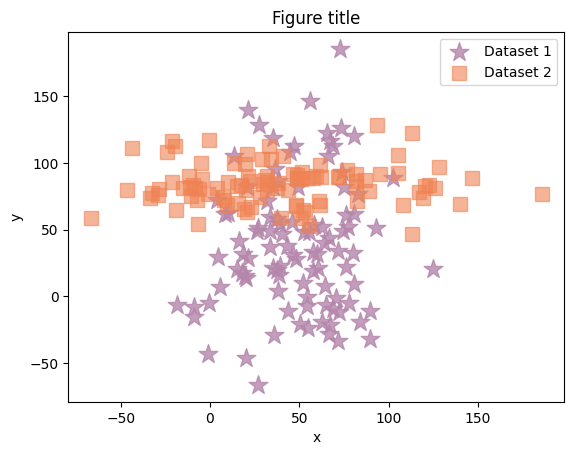

In [68]:
# Ensuring we are using the default matplotlib settings
matplotlib.rc_file_defaults()

fig = plt.figure()
ax = fig.subplots()

ax.scatter(x=data["Distribution 1"], y=data["Distribution 2"],
           alpha=0.8, color="#B486AB",
           label="Dataset 1",
           marker="*", s=200)
ax.scatter(x=data["Distribution 2"], y=data["Distribution 3"],
           alpha=0.6, color="#EF8354",
           label="Dataset 2",
           marker="s", s=100)


ax.set_xlabel("x")
ax.set_ylabel("y")

ax.set_title("Figure title")

ax.legend()

fig.savefig("figure_name_01.png")

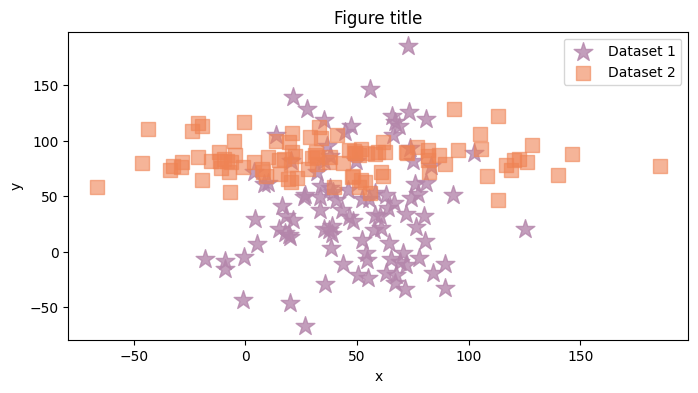

In [70]:
# Lets set figure size and dpi

# figsize in inches
fig = plt.figure(figsize=(8, 4))
ax = fig.subplots()

ax.scatter(x=data["Distribution 1"], y=data["Distribution 2"],
           alpha=0.8, color="#B486AB",
           label="Dataset 1",
           marker="*", s=200)
ax.scatter(x=data["Distribution 2"], y=data["Distribution 3"],
           alpha=0.6, color="#EF8354",
           label="Dataset 2",
           marker="s", s=100)


ax.set_xlabel("x")
ax.set_ylabel("y")

ax.set_title("Figure title")

ax.legend()

# resolution in DPI
fig.savefig("figure_name_02.png", dpi=300)